In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,5]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import read_data

df = read_data.read_data('Chicago')
cols = ['IntersectionId', 'Latitude', 'Longitude',
        'Season', 'Month', 'RushHour', 'Hour', 'Weekend',
        'EntryHeading_deg', 'ExitHeading_deg', 'TurnDegree',
        'EnterHighway', 'ExitHighway', 'EntryStreetId','ExitStreetId','ExitStreetType','EntryStreetType',
        'TimeFromFirstStop_p80']

In [2]:
data = []
for col in cols:
    data.append(df[col])
data = np.transpose(data)
x = data[:,:-1]
y = np.reshape(data[:,-1], (-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.01)
y_train = np.ravel(y_train)

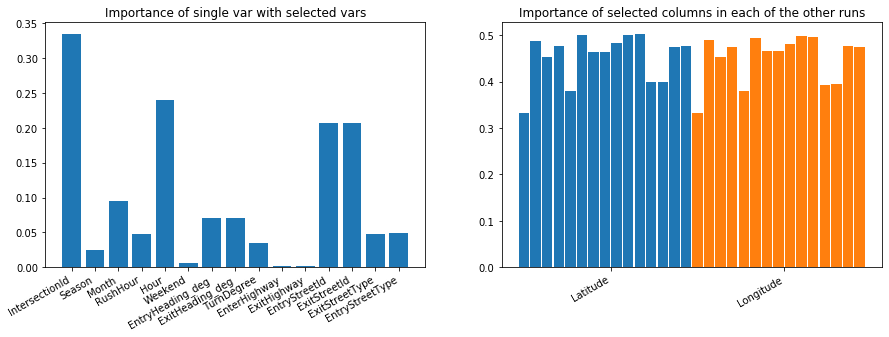

In [3]:
def custom_feature_importance(x_train, y_train, cols, selected_cols):
    col_idx = {b: a for a, b in enumerate(cols)}
    forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

    res = []
    sc_importance = []
    for j in range(len(cols)):
        if cols[j] in selected_cols:
            # this is already in our selected list so skip this one
            continue
        new_x = []
        for sc in selected_cols:
            ind = col_idx[sc]
            new_x.append(x_train[:,ind])
        new_x.append(x_train[:,col_idx[cols[j]]])
        #new_x = np.concatenate([new_x, x_train[:,j:j+1]], axis=1)
        forest.fit(np.transpose(new_x), y_train)
        importances = forest.feature_importances_
        sc_importance.append(importances[:-1])
        res.append([importances[-1], cols[j]])

    vals = [float(a) for a in np.transpose(res)[0]]
    varnames = np.transpose(res)[1]
    fig, ax = plt.subplots(1,2)
    ax[0].bar(range(len(varnames)), vals)
    ax[0].set_xticks(range(len(varnames)))
    ax[0].set_xticklabels(varnames)
    ax[0].set_title('Importance of single var with selected vars')
    fig.autofmt_xdate()

    sc_importance = np.transpose(sc_importance)
    for j in range(len(selected_cols)):
        ax[1].bar(np.arange(j,j+1,1/len(sc_importance[j])), sc_importance[j], width=0.9/len(sc_importance[j]))
    ax[1].set_xticks(np.add(0.5, range(len(selected_cols))))
    ax[1].set_xticklabels(selected_cols)
    ax[1].set_title('Importance of selected columns in each of the other runs')

custom_feature_importance(x_train, y_train, cols[:-1], ['Latitude', 'Longitude'])


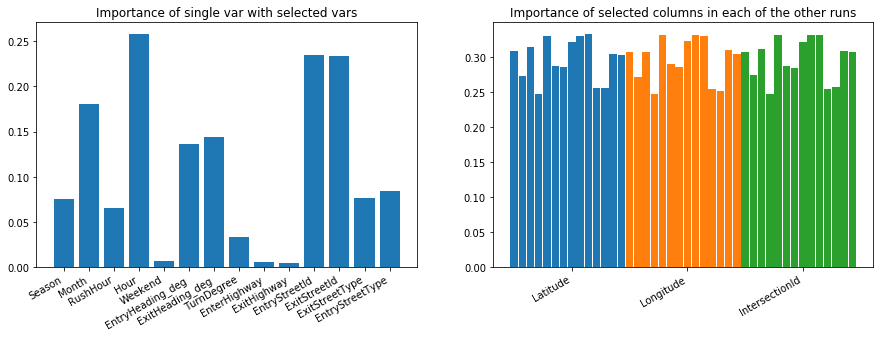

In [4]:
# I'm a little surprised that IntersectionId still adds value since Lat/Lon is there
# so lets add that in next
custom_feature_importance(x_train, y_train, cols[:-1], ['Latitude', 'Longitude', 'IntersectionId'])

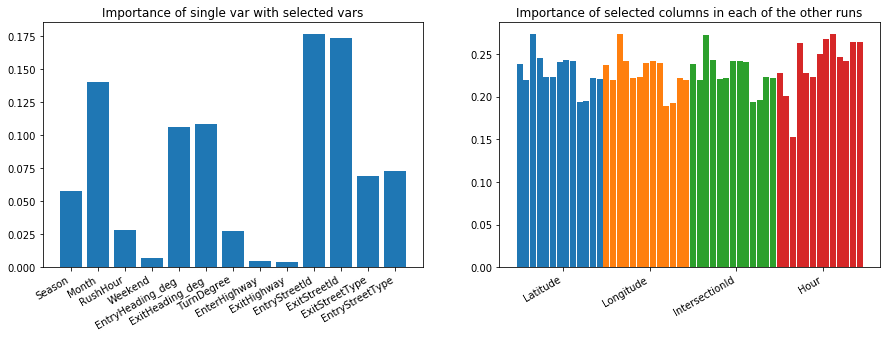

In [5]:
# Okay so next big one is hour lets add that in
custom_feature_importance(x_train, y_train, cols[:-1], ['Latitude', 'Longitude', 'IntersectionId','Hour'])

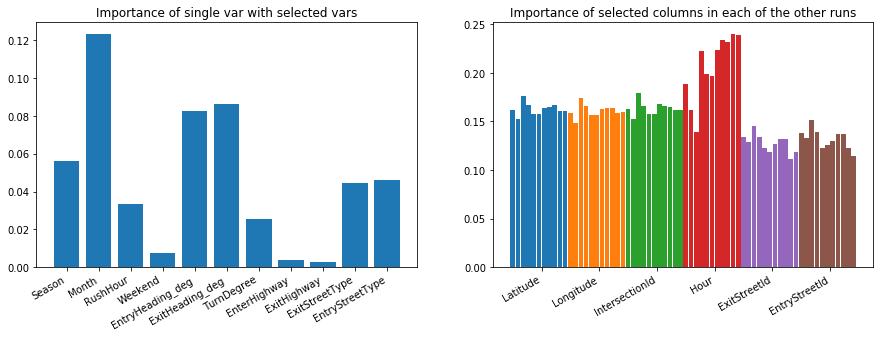

In [6]:
# Okay so ExitStreetId and EnterStreetId are next
custom_feature_importance(x_train, y_train, cols[:-1], 
        ['Latitude', 'Longitude', 'IntersectionId','Hour', 'ExitStreetId','EntryStreetId'])

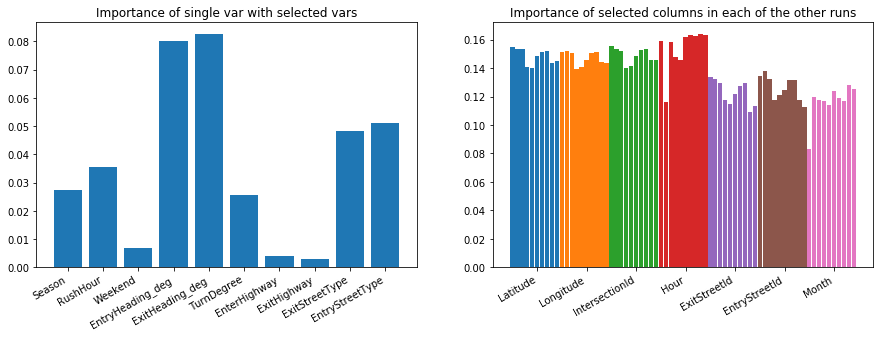

In [7]:
custom_feature_importance(x_train, y_train, cols[:-1], 
        ['Latitude', 'Longitude', 'IntersectionId','Hour', 'ExitStreetId','EntryStreetId','Month'])

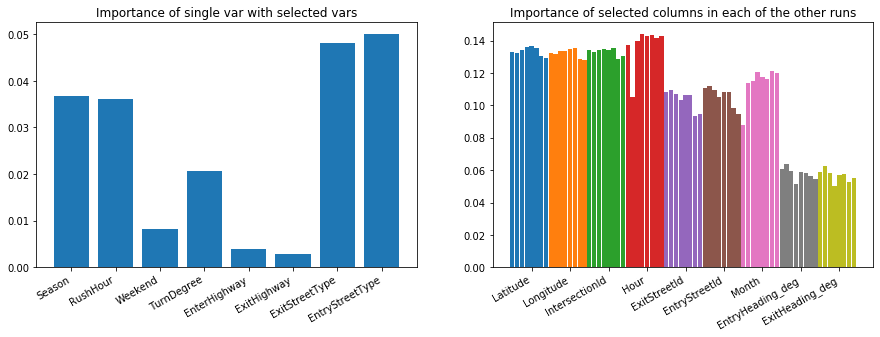

In [8]:
custom_feature_importance(x_train, y_train, cols[:-1], 
        ['Latitude', 'Longitude', 'IntersectionId','Hour', 'ExitStreetId',
         'EntryStreetId','Month', 'EntryHeading_deg','ExitHeading_deg'])

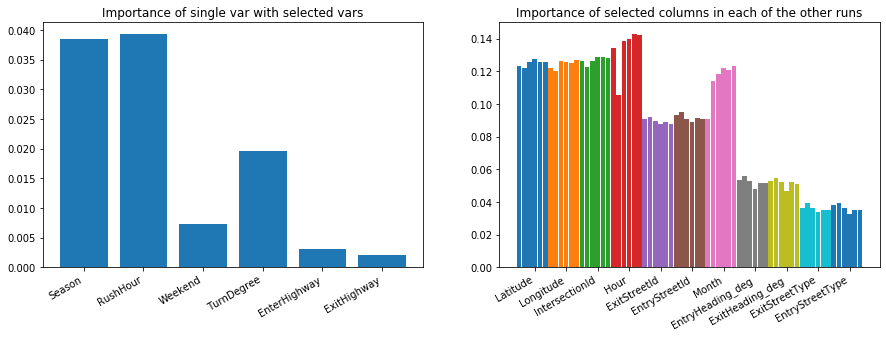

In [9]:
custom_feature_importance(x_train, y_train, cols[:-1], 
        ['Latitude', 'Longitude', 'IntersectionId','Hour', 'ExitStreetId',
         'EntryStreetId','Month', 'EntryHeading_deg','ExitHeading_deg',
        'ExitStreetType','EntryStreetType'])